# West Nile Virus Analysis & Prediction

# Part 1

## Executive Summary

In 2022, Chicago reported one human case of West Nile virus (WNV) towards the end of the summer and early fall season. This is remarkable compared to the previous 13 reported cases in the previous year, and even more in the years before. 

WNV is the leading cause of mosquito-borne disease in the US, and it is spread to people by the bite of an infected mosquito, specifically a Culex pipiens mosquito. One in five infected people with WNV would experience fever, nausea, headache and muscle aches lasting from a few days to a few weeks - while the remaining four out of five would not exhibit any symptoms. However the virus remains a major concern as individuals with weaker immune systems and those above 60 are at higher risk for severe illness from WNV. 

Every year the Chicago Department of Public Health (CDPH) runs a comprehensive surveillance program in suburban areas to trap mosquitoes and test them for WNV. This data has helped CDPH target high-risk areas for the virus and significantly reduce the number of positive cases in the last few years. ([source](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2022/september/first-human-case-of-west-nile-virus-detected-in-chicago-in-2022.html))

However the CDPH recognized that the last few years of data have major anomalies due to the COVID-19 pandemic and low infection count, hence we may not be able to use recent data to create an action plan for 2023. Our team at the Disease and Treatment Agency was tasked to analyze the years with more severe WNV outbreak and devise a plan to minimize the spread of the WNV. Through the historical data from the WNV surveillance reports coupled with weather information and pesticide usage,
1. We used machine learning models to predict when and where the mosquitoes will test positive for WNV.
2. The best model allowed us to predict WNV outbreaks as accurately as possible so that we can effectively allocate resources to curb the virus transmission.


*Content:*

1. [Executive Summary](#Executive-Summary)
2. [Datasets & Methodology](#Datasets-&-Methodology)
3. [Data Cleaning](#Data-Cleaning)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)

*Links to next notebooks:*
- Part 2: Modeling & Tuning
- Part 3: Conclusion & Recommendations

## Datasets & Methodology

### About the datasets

- [`train.csv`](../assets/train.csv): This is the main dataset we'll be working with, which contains 10,506 observations on the presence of West Nile Virus across neighborhood clusters in Chicago, Illinois. This dataset is taken from the years 2007, 2009, 2011 and 2013. There are a total of 11 variables involved in tracking the West Nile Virus in the neighborhoods.
- [`test.csv`](../assets/test.csv): There's a total of 11 features and 116,293 observations for the years 2008, 2010, 2012 and 2014. The presence of West Nile Virus is missing from this set, which we will use our model to predict. 
- [`spray.csv`](../assets/spray.csv): This dataset contains 14,835 geographic information system (GIS) data on the city's spraying efforts in 2011 and 2013 - including the date, time, latitude and longitude.
-  [`weather.csv`](../assets/weather.csv): This dataset contains weather information from 2007 to 2014 - covering 2,944 observations across 22 relevant weather-related variables. 
- [`mapdata_copyright_openstreetmap_contributors.txt`](../assets/mapdata_copyright_openstreetmap_contributors.txt): Map files from Open Streetmap and used for visualizations in the analysis. 

### Data dictionary

| **Feature**            	| **Type** 	| **Dataset**              	| **Description**                                                                         	|
|------------------------	|----------	|--------------------------	|-----------------------------------------------------------------------------------------	|
| Id                     	| int      	| `train.csv` & `test.csv` 	| ID number of the record                                                                 	|
| Date                   	| object   	| `train.csv` & `test.csv` 	| Refers to the date the West Nile Virus test is performed                                	|
| Address                	| object   	| `train.csv` & `test.csv` 	| The approximate address of the location of trap; sent to GeoCoder                       	|
| Species                	| object   	| `train.csv` & `test.csv` 	| The mosquito species in trap                                                            	|
| Block                  	| int      	| `train.csv` & `test.csv` 	| Refers to block number of address                                                       	|
| Street                 	| object   	| `train.csv` & `test.csv` 	| Refers to street of address                                                             	|
| Trap                   	| object   	| `train.csv` & `test.csv` 	| ID number of the trap                                                                   	|
| AddressNumberAndStreet 	| object   	| `train.csv` & `test.csv` 	| The approximate address retrieved from GeoCoder                                         	|
| Latitude               	| float    	| `train.csv` & `test.csv` 	| The latitude retrieved from GeoCoder                                                    	|
| Longitude              	| float    	| `train.csv` & `test.csv` 	| The longitude retrieved from GeoCoder                                                   	|
| AddressAccuracy        	| int      	| `train.csv` & `test.csv` 	| The accuracy of information returned from GeoCoder                                      	|
| NumMosquitos           	| int      	| `train.csv` & `test.csv` 	| The number of mosquitoes in the trap                                                    	|
| WnvPresent             	| int      	| `train.csv` & `test.csv` 	| Whether or not West Nile Virus is present in these mosquitoes (1 = present; 0 = absent) 	|
| Date                   	| object   	| `spray.csv`              	| The date of spray                                                                       	|
| Time                   	| object   	| `spray.csv`              	| The time of spray                                                                       	|
| Latitude               	| float    	| `spray.csv`              	| Latitude of spray                                                                       	|
| Longitude              	| float    	| `spray.csv`              	| Longitude of spray                                                                      	|
| Station                	| int      	| `weather.csv`            	| Refers to the weather station (1 or 2)                                                  	|
| Date                   	| object   	| `weather.csv`            	| Refers to the date of measurement                                                       	|
| Tmax                   	| int      	| `weather.csv`            	| Maximum daily temperature (Degrees Fahrenheit)                                          	|
| Tmin                   	| int      	| `weather.csv`            	| Minimum daily temperature (Degrees Fahrenheit)                                          	|
| Tavg                   	| object   	| `weather.csv`            	| Average daily temperature (Degrees Fahrenheit)                                          	|
| Depart                 	| object   	| `weather.csv`            	| Departure from normal temperature (Degrees Fahrenheit)                                  	|
| Dewpoint               	| int      	| `weather.csv`            	| Average dew point (Degrees Fahrenheit)                                                  	|
| WetBulb                	| object   	| `weather.csv`            	| Average wet bulb (Degrees Fahrenheit)                                                   	|
| Heat                   	| object   	| `weather.csv`            	| Heating degree days                                                                     	|
| Cool                   	| object   	| `weather.csv`            	| Cooling degree days                                                                     	|
| Sunrise                	| object   	| `weather.csv`            	| Time of sunrise (calculated, not observed)                                              	|
| Sunset                 	| object   	| `weather.csv`            	| Time of sunset (calculated, not observed)                                               	|
| CodeSum                	| object   	| `weather.csv`            	| Code of weather phenomena                                                               	|
| Depth                  	| object   	| `weather.csv`            	| Depth of snow on the ground (M = Missing data)                                          	|
| Water1                 	| object   	| `weather.csv`            	| Water equivalent (M = Missing data)                                                     	|
| SnowFall               	| object   	| `weather.csv`            	| Snowfall (inch) (M = Missing data, T= Trace)                                            	|
| PrecipTotal            	| object   	| `weather.csv`            	| Total daily rainfall (inch)                                                             	|
| StnPressure            	| object   	| `weather.csv`            	| Average atmospheric pressure (inch Hg)                                                  	|
| SeaLevel               	| object   	| `weather.csv`            	| Average sea level pressure (inch Hg)                                                    	|
| ResultSpeed            	| float    	| `weather.csv`            	| Resultant wind speed (mph)                                                              	|
| ResultDir              	| int      	| `weather.csv`            	| Resultant wind direction (Degrees)                                                      	|
| AvgSpeed               	| object   	| `weather.csv`            	| Average wind speed (mph)                                                                	|

### Additional References

1. [First Human Case of West Nile Virus Detected in Chicago in 2022](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_communities/news/2022/september/first-human-case-of-west-nile-virus-detected-in-chicago-in-2022.html)
- We referred to this news article on the most recent WNV report in 2022, along with summary of cases in 2021 and the virus. 
- The article helped us better understand context of WNV in Chicago and snippets from the article was included in the executive summary above.

2. [The drivers of West Nile virus human illness in the Chicago, Illinois, USA area](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/)
- We referred to this study to better understand how to assess factors influencing the WNV spread in Chicago.

3. [Mosquito Surveillance Software](https://www.cdc.gov/westnile/resourcepages/mosqSurvSoft.html)
- We referred to this CDC guide on calculating virus infection rate, and attempted to include the calculation in the EDA process.

4. [Economic Cost Analysis of West Nile Virus Outbreak, Sacramento County, California, USA, 2005](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)
- We referred to this study for an indication of economic costs involved in managing WNV outbreak.
- The values from this study were used in the cost-benefit analysis section of our project.

### Methodology

For this project, we've conducted a thorough analysis and modeling through these steps:
1. **Data Cleaning**: We assessed the training dataset for any outliers and removed them immediately. We also checked for missing values where we've filled them or removed them if irrelevant.
2. **Exploratory Data Analysis**: We visualized the dataset through a series of graphs and plots to better understand the relationships between variables as well as its individual impact the spread of the West Nile Virus.
3. **Feature Engineering & Data Preprocessing**: After evaluating specific variables, we removed variables that didn't have much impact and combined variables that were relevant to each other.
4. **Data Modeling & Evaluation**: Based on the selected features, we modeled them through these classification models - **XXX**. The best model will then be used to predict the presence of West Nile Virus in the test dataset. 
5. **Cost-Benefit Analysis**: Following the best model selected, we also conducted a cost-benefit analysis on annual cost of pesticide coverage and its benefits - particularly for areas that are at higher risk.

We've also uploaded the predicted West Nile Virus presence on [Kaggle](https://www.kaggle.com/competitions/predict-west-nile-virus/data) to measure the accuracy of our finalized model.

## Data Cleaning

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from datetime import datetime, time

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#change display options
pd.set_option("display.max_rows", 160)
pd.set_option("display.max_columns", 80)

### Load datasets

In [2]:
df_train = pd.read_csv('../assets/train.csv')
df_spray = pd.read_csv('../assets/spray.csv')
df_weather = pd.read_csv('../assets/weather.csv')
map_data = np.loadtxt('../assets/mapdata_copyright_openstreetmap_contributors.txt')
df_test = pd.read_csv('../assets/test.csv')

### Dataset: `train.csv`

In [3]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
df_train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [6]:
# converting Date in train dataset to python readable date-time format
df_train['Date'] = pd.to_datetime(df_train['Date'])

In [7]:
# Date range:
print(f'From:{df_train["Date"].min()}')
print(f"To:{df_train['Date'].max()}")

From:2007-05-29 00:00:00
To:2013-09-26 00:00:00


In [8]:
# extract the date features
df_train['Year'] = df_train['Date'].apply(lambda x: x.year)
df_train['Month'] = df_train['Date'].apply(lambda x: x.month)
df_train['Week'] = df_train['Date'].apply(lambda x: x.week)
df_train['DayOfWeek'] = df_train['Date'].apply(lambda x: x.dayofweek)

### Dataset: `spray.csv`

The City of Chicago also does spraying to kill mosquitos. You are given the GIS data for their spray efforts in 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus. 

In [9]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [10]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [12]:
df_spray.head(10)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [13]:
# Check that null values from Time column only occurs for 2011-09-07
df_spray[df_spray["Time"].isnull()].groupby("Date").Latitude.count()

Date
2011-09-07    584
Name: Latitude, dtype: int64

In [14]:
# Mode/Median for spray timing on 2011-09-07
print(f'Mode: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).mode()}')
print(f'Median: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).median()}')
print(f'Min: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).min()}')
print(f'Max: {pd.to_datetime(df_spray[df_spray["Date"]=="2011-09-07"]["Time"]).max()}')

Mode: 0   2022-12-15 19:44:32
Name: Time, dtype: datetime64[ns]
Median: 2022-12-15 20:11:06
Min: 2022-12-15 19:42:12
Max: 2022-12-15 21:41:10


Text(0.5, 0, 'Time')

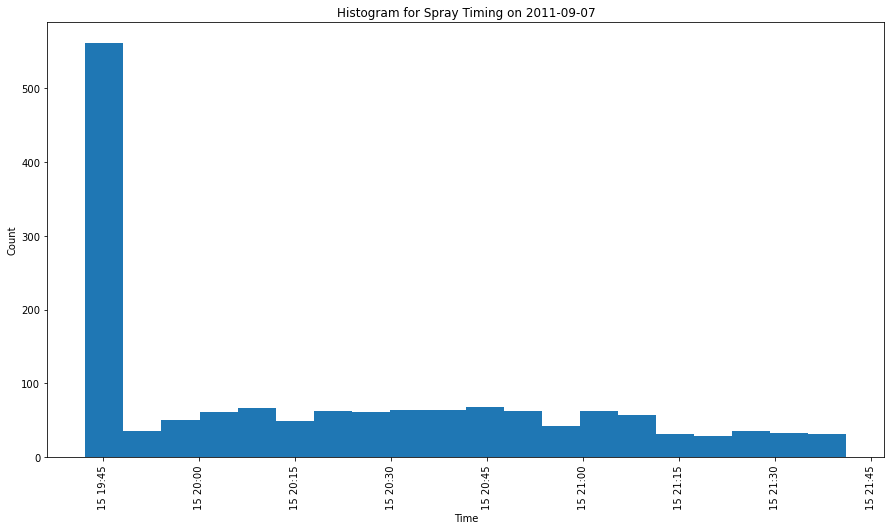

In [15]:
# Plotting histogram of spray timing
df_spray_0907 = df_spray[df_spray["Date"]=='2011-09-07']
plt.figure(figsize =(15,8))
plt.xticks(rotation=90)
df_spray_1 = df_spray_0907[df_spray_0907["Time"].notnull()]
plt.hist(pd.to_datetime(df_spray_1['Time']),bins = 20)
plt.title("Histogram for Spray Timing on 2011-09-07")
plt.ylabel("Count")
plt.xlabel("Time")

In [16]:
# replacing null values in df_spray "Time" column with mode timing
df_spray["Time"].fillna("7:44:32 PM", inplace = True)
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14835 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [17]:
#create datetime column:
df_spray["datetime"] = df_spray["Date"] + " " + df_spray["Time"]
df_spray.head()

,Date,Time,Latitude,Longitude,datetime
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 6:56:58 PM
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 6:57:08 PM
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 6:57:18 PM
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 6:57:28 PM
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 6:57:38 PM


In [18]:
# converting to python readable date-time format
df_spray['datetime'] = pd.to_datetime(df_spray['datetime'])

In [19]:
# set datetime column to be the index
df_spray.set_index('datetime', inplace=True)

In [20]:
df_spray.head()

,Date,Time,Latitude,Longitude
datetime,,,,
2011-08-29 18:56:58,2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29 18:57:08,2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29 18:57:18,2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29 18:57:28,2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29 18:57:38,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [21]:
# Date range:
print(f'From:{df_spray["Date"].min()}')
print(f"To:{df_spray['Date'].max()}")

From:2011-08-29
To:2013-09-05


### Dataset: `weather.csv`

In [22]:
df_weather.head(50)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,-,-,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,-,-,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [23]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [24]:
# converting Date in train dataset to python readable date-time format
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [25]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [26]:
# replace M with NaN
df_weather.replace(to_replace= "M", value=np.NaN, inplace = True)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

##### Tavg

In [27]:
# replacing missing values in Tavg with cal avg of Tmax and Tmin 
df_weather["Tavg"] = df_weather.loc[:,["Tmax","Tmin"]].mean(axis = 1).apply(np.ceil)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

- Seeing that there were some null values under Tavg, we have recalculated the Tavg for each day for individual stations, using Tmax and Tmin values. Believe that temperature related features/factors will be critical for mosquito growth and hence the prediction of West Nile Virus.

##### Depart

In [28]:
# breaking down dataset into respective stations
df_weather_1 = df_weather[df_weather["Station"]==1]
df_weather_2 = df_weather[df_weather["Station"]==2]
df_weather_1 = df_weather_1.reset_index()
df_weather_2 = df_weather_2.reset_index()

In [29]:
# checking missing values in Depart column
display(df_weather_1.head())
display(df_weather_2.head())

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,1,2007-05-01,83,50,67.0,14,51,56,0,2,0448,1849,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,1,2007-05-02,59,42,51.0,-3,42,47,14,0,0447,1850,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
2,4,1,2007-05-03,66,46,56.0,2,40,48,9,0,0446,1851,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
3,6,1,2007-05-04,66,49,58.0,4,41,50,7,0,0444,1852,RA,0,NaN,0.0,T,29.31,30.05,10.4,8,10.8
4,8,1,2007-05-05,66,53,60.0,5,38,49,5,0,0443,1853,,0,NaN,0.0,T,29.40,30.10,11.7,7,12.0


,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2,2007-05-01,84,52,68.0,NaN,51,57,0,3,-,-,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
1,3,2,2007-05-02,60,43,52.0,NaN,42,47,13,0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
2,5,2,2007-05-03,67,48,58.0,NaN,40,50,7,0,-,-,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
3,7,2,2007-05-04,78,51,65.0,NaN,42,50,NaN,NaN,-,-,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
4,9,2,2007-05-05,66,54,60.0,NaN,39,50,5,0,-,-,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5


In [30]:
# calculate 30 year normal temperature from station 1 and merge to station 2 dataset
df_weather_1["Depart"] = df_weather_1["Depart"].astype(float)
df_weather_2["30_yr_temp"]= df_weather_1["Tavg"] - df_weather_1["Depart"].astype(float)

In [31]:
# Calculate Depart value for station 2
df_weather_2["Depart"] = df_weather_2["Tavg"] - df_weather_2["30_yr_temp"]
df_weather_2.head()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
0,1,2,2007-05-01,84,52,68.0,15.0,51,57,0,3,-,-,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6,53.0
1,3,2,2007-05-02,60,43,52.0,-2.0,42,47,13,0,-,-,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4,54.0
2,5,2,2007-05-03,67,48,58.0,4.0,40,50,7,0,-,-,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2,54.0
3,7,2,2007-05-04,78,51,65.0,11.0,42,50,NaN,NaN,-,-,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4,54.0
4,9,2,2007-05-05,66,54,60.0,5.0,39,50,5,0,-,-,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5,55.0


- Although there were a large number of null values in our dataset for Depart feature, we have chosen to keep this feature. All of the null values were observed to be from station 2. Thus what we have done was to extract the 30 year normal temperature using the Tavg and Depart readings from station 1, and subsequently use the 30 year normal temperature values to calculate for the missing Depart values in station 2.

##### Wet Bulb

In [32]:
# checking for null values
display(df_weather_1[df_weather_1["WetBulb"].isnull()])
display(df_weather_2[df_weather_2["WetBulb"].isnull()])

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
424,848,1,2009-06-26,86,69,78.0,7.0,60,NaN,0,13,0418,1931,,0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
1205,2410,1,2013-08-10,81,64,73.0,0.0,57,NaN,0,8,0454,1900,,0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
1206,2412,1,2013-08-11,81,60,71.0,-2.0,61,NaN,0,6,0455,1859,RA,0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0


,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
1207,2415,2,2013-08-12,85,69,77.0,4.0,63,NaN,0,12,-,-,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7,73.0


In [33]:
# replace null values
df_weather_1["WetBulb"]=df_weather_1["WetBulb"].fillna(method="ffill").astype(float)
df_weather_2["WetBulb"]=df_weather_2["WetBulb"].fillna(method="ffill").astype(float)

- Replaced null values through the use of forward fill method, as we do not expect to much day to day variation for this feature for individual stations.

##### Heat/Cool

In [34]:
# Port over Heat values from station 1 to replace null values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Heat"] is np.NaN:
        df_weather_2.loc[i,"Heat"] = df_weather_1.loc[i,"Heat"]
        
# Port over Cool values from station 1 to replace null values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Cool"] is np.NaN:
        df_weather_2.loc[i,"Cool"] = df_weather_1.loc[i,"Cool"]

In [35]:
# change to float
df_weather_1["Heat"] = df_weather_1["Heat"].astype(float) 
df_weather_2["Heat"] = df_weather_2["Heat"].astype(float)

In [36]:
# change to float
df_weather_1["Cool"] = df_weather_1["Cool"].astype(float) 
df_weather_2["Cool"] = df_weather_2["Cool"].astype(float) 

- Observe that all the null values were for station 2. Replaced null values using the non-null values from station 1. 

##### Sunrise/Sunset

In [37]:
# Check on unique values for sunrise in station 2
df_weather_2["Sunrise"].unique()

array(['-'], dtype=object)

In [38]:
# Check on unique values for sunset in station 2
df_weather_2["Sunset"].unique()

array(['-'], dtype=object)

In [39]:
# Port over Sunrise values from station 1 to replace "-" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Sunrise"] is "-":
        df_weather_2.loc[i,"Sunrise"] = df_weather_1.loc[i,"Sunrise"]

# Port over Sunset values from station 1 to replace "-" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"Sunset"] is "-":
        df_weather_2.loc[i,"Sunset"] = df_weather_1.loc[i,"Sunset"]

In [40]:
df_weather_2.head()

,index,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,30_yr_temp
0,1,2,2007-05-01,84,52,68.0,15.0,51,57.0,0.0,3.0,0448,1849,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6,53.0
1,3,2,2007-05-02,60,43,52.0,-2.0,42,47.0,13.0,0.0,0447,1850,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4,54.0
2,5,2,2007-05-03,67,48,58.0,4.0,40,50.0,7.0,0.0,0446,1851,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2,54.0
3,7,2,2007-05-04,78,51,65.0,11.0,42,50.0,7.0,0.0,0444,1852,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4,54.0
4,9,2,2007-05-05,66,54,60.0,5.0,39,50.0,5.0,0.0,0443,1853,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5,55.0


In [41]:
# convert sunrise to python readable time format
df_weather_1["Sunrise_1"] = pd.to_datetime(df_weather_1['Sunrise'], format='%H%M')
df_weather_2["Sunrise_1"] = pd.to_datetime(df_weather_2['Sunrise'], format='%H%M')

In [42]:
# changing sunset values with e.g. 1860 to 1900, so that datatime method can convert values. 
# weather_1
for i in range(len(df_weather_1)):
    a = list((df_weather_1.loc[i,"Sunset"]))
    if a[2] == '6':
        a[2] = '0'
        a[1] = str(int(a[1]) + 1)
        df_weather_1.loc[i,"Sunset"] = ''.join(a)

#weather_2
for i in range(len(df_weather_2)):
    a = list((df_weather_2.loc[i,"Sunset"]))
    if a[2] == '6':
        a[2] = '0'
        a[1] = str(int(a[1]) + 1)
        df_weather_2.loc[i,"Sunset"] = ''.join(a)

In [43]:
# convert sunrise to python readable time format
df_weather_1["Sunset_1"] = pd.to_datetime(df_weather_1['Sunset'], format='%H%M')
df_weather_2["Sunset_1"] = pd.to_datetime(df_weather_2['Sunset'], format='%H%M')

In [44]:
# find delta duration between sunrise and sunset
df_weather_1["daylight_duration"] = df_weather_1["Sunset_1"] - df_weather_1["Sunrise_1"]
df_weather_2["daylight_duration"] = df_weather_2["Sunset_1"] - df_weather_2["Sunrise_1"]

- Needed to convert the sunrise sunset timings to a python readable format prior to utilizing the features. However observed that sunset timings had values like 1860, which were not in the correct format (should be 1900). Thus had to convert these values first into the correct format, prior to imputing them to a python readable format for further calculation of delta duration between sunrise and sunset.

##### Codesum

In [45]:
# replace blank values with Clear
df_weather_1["CodeSum"].replace(to_replace=' ',value="Clear", inplace = True)
df_weather_2["CodeSum"].replace(to_replace=' ',value="Clear", inplace = True)

In [46]:
display(df_weather_1["CodeSum"].unique())
display(df_weather_2["CodeSum"].unique())

array(['Clear', 'BR', 'RA', 'BR HZ', 'RA BR', 'RA VCTS', 'RA HZ',
       'TSRA RA BR HZ', 'HZ', 'TSRA BR HZ', 'TSRA RA BR', 'TSRA RA HZ',
       'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU', 'BR HZ FU',
       'TSRA RA VCTS', 'HZ VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'RA BR HZ', 'TSRA RA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA', 'TS TSRA RA BR VCTS',
       'TS RA', 'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TSRA RA FG+ FG BR', 'TSRA DZ FG+ FG BR HZ', 'TS TSRA',
       'TSRA HZ', 'TS', 'FG+ BR HZ', 'TS TSRA BR HZ', 'DZ BR HZ',
       'TS TSRA BR', 'RA BR FU', 'TS BR HZ', 'FG+ BR', 'FG+ MIFG BR',
       'TSRA RA FG BR', 'DZ', 'RA DZ BR HZ', 'TS BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'RA BR SQ', 'RA FG BR', 'RA BR HZ FU',
       'MIFG BCFG BR', 'TSRA RA FG+ FG BR HZ', 'TSRA DZ BR HZ',
       'TS TSRA RA FG BR HZ', 'RA DZ FG+ BR', 'TSRA FG+ BR HZ',
       'FG+ FG BR HZ', 'FG BR HZ', 'TS RA BR HZ',

array(['Clear', 'BR HZ', 'HZ', 'TSRA RA BR', 'RA BR', 'TSRA RA', 'RA HZ',
       'TSRA BR HZ', 'RA BR HZ VCTS', 'RA', 'TSRA RA HZ', 'TSRA RA HZ FU',
       'BR', 'TSRA HZ', 'VCTS', 'TS TSRA RA BR HZ VCTS', 'TS TSRA BR HZ',
       'RA BR HZ', 'TSRA RA BR VCTS', 'TSRA RA DZ BR HZ', 'TSRA',
       'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA BR HZ', 'TS TSRA BR',
       'TSRA RA BR HZ', 'RA BCFG BR', 'TSRA BR', 'RA DZ', 'RA DZ BR',
       'TS TSRA RA HZ', 'TS BR', 'RA BR SQ', 'TS TSRA RA', 'TS RA',
       'TSRA RA VCTS', 'TSRA RA BR HZ VCTS', 'BR VCTS', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR', 'DZ BR HZ', 'DZ', 'FG+ FG BR', 'FG+ BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG BR HZ',
       'TS TSRA RA FG BR', 'TS BR HZ', 'BR HZ VCFG', 'TSRA RA FG+ BR',
       'TS TSRA RA VCTS', 'FU', 'TS', 'TS TSRA VCFG', 'TS TSRA HZ',
       'TS TSRA GR RA BR', 'HZ FU', 'RA BR HZ FU', 'FG+ BCFG BR',
       'TSRA RA FG+ FG BR', 'FG+', 'TSRA BR SQ', 'RA BR HZ VCFG',
       'RA FG+ BR', 'FG BR H

- Replaced the missing values with 'clear' for both stations.

##### Depth

In [47]:
# check on Depth unique values
display(df_weather_1["Depth"].unique())
display(df_weather_2["Depth"].unique())

array(['0'], dtype=object)

array([nan], dtype=object)

In [48]:
# drop Depth since all 0 values
df_weather_1.drop("Depth", axis = 1, inplace = True)

# drop Depth since all nan values
df_weather_2.drop("Depth", axis = 1, inplace = True)

- Dropped depth since all the values were 0 or nan for each station.

##### Water1

In [49]:
# drop Water1, since all null values
df_weather_1.drop("Water1", axis = 1, inplace = True)
df_weather_2.drop("Water1", axis = 1, inplace = True)

- Dropped Water1 since all the values were 0 for each station.

##### SnowFall

In [50]:
# check on SnowFall unique values
display(df_weather_1["SnowFall"].unique())
display(df_weather_2["SnowFall"].unique())

array(['0.0', '  T', '0.1'], dtype=object)

array([nan], dtype=object)

In [51]:
# replace Trace values with 0 - since a trace is anything less than can be measured
df_weather_1["SnowFall"].replace(to_replace= '  T', value="0.0", inplace = True)

In [52]:
# Port over SnowFall values from station 1 to replace "nan" values
for i in df_weather_2.index:
    if df_weather_2.loc[i,"SnowFall"] is np.NaN:
        df_weather_2.loc[i,"SnowFall"] = df_weather_1.loc[i,"SnowFall"]

In [53]:
# change to float datatype
df_weather_1["SnowFall"] = df_weather_1["SnowFall"].astype(float)
df_weather_2["SnowFall"] = df_weather_2["SnowFall"].astype(float)

- Observe that all the null values were for station 2. Replaced null values using the non-null values from station 1, since we do not expect too much difference in terms of snowfall across the stations which were only ~20 km apart.

##### Precipitotal

In [54]:
display(df_weather_1["PrecipTotal"].unique())
display(df_weather_2["PrecipTotal"].unique())

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

array(['0.00', '  T', '0.02', '0.60', '0.07', '0.11', '0.09', '0.28',
       '0.08', '0.53', '0.21', '0.32', '0.31', '0.27', '0.16', '0.93',
       '0.34', '0.35', nan, '0.66', '0.24', '0.92', '0.01', '0.89',
       '0.04', '0.97', '0.05', '0.06', '0.46', '0.23', '0.45', '0.83',
       '0.42', '1.33', '0.48', '0.88', '1.96', '0.20', '0.25', '0.67',
       '0.14', '0.17', '0.19', '0.15', '0.03', '0.41', '0.74', '0.71',
       '1.46', '0.26', '0.30', '0.22', '1.31', '0.29', '0.12', '0.43',
       '0.65', '1.22', '0.13', '0.50', '0.59', '2.68', '1.01', '0.62',
       '3.07', '1.75', '0.86', '0.63', '1.03', '0.70', '1.38', '1.14',
       '1.07', '0.87', '0.78', '1.12', '0.10', '0.61', '0.54', '1.19',
       '0.44', '0.33', '0.84', '1.29', '1.05', '1.15', '0.72', '0.40',
       '1.57', '1.30', '0.51', '1.23', '0.77', '3.15', '4.73', '0.52',
       '1.60', '0.57', '0.37', '1.90', '0.18', '0.69', '2.17', '0.36',
       '0.49', '0.39', '0.90', '0.38', '0.56', '0.55', '1.02', '3.66',
       '1.

In [55]:
# replace Trace values with 0 - since a trace is anything less than can be measured
df_weather_1["PrecipTotal"].replace(to_replace= '  T', value="0.00", inplace = True)
df_weather_2["PrecipTotal"].replace(to_replace= '  T', value="0.00", inplace = True)

In [56]:
# replace null values for PrecipTotal for station 2 with rain fall from the previous day.
df_weather_2["PrecipTotal"]=df_weather_2["PrecipTotal"].fillna(method="ffill").astype(float)

In [57]:
# change to float datatype
df_weather_1["PrecipTotal"] = df_weather_1["PrecipTotal"].astype(float)

- Replaced the trace values (T) with 0 for both stations, as trace is the amount of rainfall that is anything less than can be measured.

##### StnPressure

In [58]:
# fill null values for StnPressure with previous day values
df_weather_1["StnPressure"] = df_weather_1["StnPressure"].fillna(method="ffill").astype(float)
df_weather_2["StnPressure"] = df_weather_2["StnPressure"].fillna(method="ffill").astype(float)

- Replaced null values through the use of forward fill method, as we do not expect to much day to day variation for this feature for individual stations.

##### SeaLevel

In [59]:
# fill null values for SeaLevel with previous day values
df_weather_1["SeaLevel"] = df_weather_1["SeaLevel"].fillna(method="ffill").astype(float)
df_weather_2["SeaLevel"] = df_weather_2["SeaLevel"].fillna(method="ffill").astype(float)

- Replaced null values through the use of forward fill method, as we do not expect to much day to day variation for this feature for individual stations.

##### AvgSpeed

In [60]:
# fill null values for AvgSpeed with previous day values
df_weather_2["AvgSpeed"] = df_weather_2["AvgSpeed"].fillna(method="ffill")

In [61]:
# change to float datatype
df_weather_1["AvgSpeed"] = df_weather_1["AvgSpeed"].astype(float)
df_weather_2["AvgSpeed"] = df_weather_2["AvgSpeed"].astype(float)

- Replaced null values through the use of forward fill method, as we do not expect to much day to day variation for this feature for individual stations.

##### Humidity

In [62]:
# Relative humidity calculator
def RH_cal(Dp_f,T_f):
    Dp_c = (Dp_f-32)/1.8
    T_c = (T_f-32)/1.8
    RH = 100*((math.exp((17.625*Dp_c)/(243.04+Dp_c)))/(math.exp((17.625*T_c)/(243.04+T_c))))
    return RH

In [63]:
# calculate humidity values 
df_weather_1["Humidity"] = 0
for i in range(len(df_weather_1)):
    df_weather_1.loc[i,"Humidity"] = round(RH_cal(df_weather_1.loc[i,"DewPoint"],df_weather_1.loc[i,"Tavg"]),2)
    
df_weather_2["Humidity"] = 0
for i in range(len(df_weather_2)):
    df_weather_2.loc[i,"Humidity"] = round(RH_cal(df_weather_2.loc[i,"DewPoint"],df_weather_2.loc[i,"Tavg"]),2)

In [64]:
# display humidity values
display(df_weather_1.loc[:,["Humidity","Tavg","DewPoint"]].head())
display(df_weather_2.loc[:,["Humidity","Tavg","DewPoint"]].head())

,Humidity,Tavg,DewPoint
0,56.44,67.0,51
1,71.20,51.0,42
2,54.87,56.0,40
3,53.08,58.0,41
4,43.97,60.0,38


,Humidity,Tavg,DewPoint
0,54.53,68.0,51
1,68.61,52.0,42
2,51.06,58.0,40
3,43.07,65.0,42
4,45.72,60.0,39


- We suspect that relative humidity could be a strong feature that affects the sperad of the West Nile Virus, as it increases the growth of mosquitoes. With reference to the following relative humidity calculator, link: https://www.omnicalculator.com/physics/relative-humidity, we know that relative humidity can be calculated by the following formula:

$$RH = 100\frac {e^{(17.625*Dp)\over(243.04+Dp)}} {e^{(17.625*T)\over(243.04+T)}}$$

#### RH - Relative Humidity <br><br> Dp - Dew Point <br> <br>T - Average Temperature

#### Add in time lag for features

- Addition of timelag features to consider life cycle of Culex Pipiens mosquitoes. Mosquitoes take around 7 to 10 days to hatch out and develop into their adult forms. The adult mosquito if infected by the WNV, will then become the vector of the virus.
- Included 7,14,21 days rolling average to check on whether there are any strong correlation between different time lag duration with WNV counts.

In [65]:
# extract the date features before setting as index --> for station 1 and 2
df_weather_1['Year'] = df_weather_1['Date'].apply(lambda x: x.year)
df_weather_1['Month'] = df_weather_1['Date'].apply(lambda x: x.month)
df_weather_1['Week'] = df_weather_1['Date'].apply(lambda x: x.week)
df_weather_1['DayOfWeek'] = df_weather_1['Date'].apply(lambda x: x.dayofweek)

df_weather_2['Year'] = df_weather_2['Date'].apply(lambda x: x.year)
df_weather_2['Month'] = df_weather_2['Date'].apply(lambda x: x.month)
df_weather_2['Week'] = df_weather_2['Date'].apply(lambda x: x.week)
df_weather_2['DayOfWeek'] = df_weather_2['Date'].apply(lambda x: x.dayofweek)

In [66]:
# changing index to date time
df_weather_1.set_index("Date", inplace = True)
df_weather_2.set_index("Date", inplace = True)

In [67]:
df_weather_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   index              1472 non-null   int64          
 1   Station            1472 non-null   int64          
 2   Tmax               1472 non-null   int64          
 3   Tmin               1472 non-null   int64          
 4   Tavg               1472 non-null   float64        
 5   Depart             1472 non-null   float64        
 6   DewPoint           1472 non-null   int64          
 7   WetBulb            1472 non-null   float64        
 8   Heat               1472 non-null   float64        
 9   Cool               1472 non-null   float64        
 10  Sunrise            1472 non-null   object         
 11  Sunset             1472 non-null   object         
 12  CodeSum            1472 non-null   object         
 13  SnowFall           1472 non-nu

In [68]:
# sorting index
df_weather_1.sort_index(inplace = True)
df_weather_2.sort_index(inplace = True)

In [69]:
df_weather_final = df_weather_1.drop("index",axis=1).append(df_weather_2.drop(["30_yr_temp",'index'],axis=1))
df_weather_final = df_weather_final.sort_index()
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Station            2944 non-null   int64          
 1   Tmax               2944 non-null   int64          
 2   Tmin               2944 non-null   int64          
 3   Tavg               2944 non-null   float64        
 4   Depart             2944 non-null   float64        
 5   DewPoint           2944 non-null   int64          
 6   WetBulb            2944 non-null   float64        
 7   Heat               2944 non-null   float64        
 8   Cool               2944 non-null   float64        
 9   Sunrise            2944 non-null   object         
 10  Sunset             2944 non-null   object         
 11  CodeSum            2944 non-null   object         
 12  SnowFall           2944 non-null   float64        
 13  PrecipTotal        2944 non-nu

In [70]:
def rename_header(days):    
    dict = {'Tavg':f'Tavg_{days}','Depart':f'Depart_{days}', 'DewPoint':f'DewPoint_{days}', 'WetBulb':f'WetBulb_{days}',
       'Heat':f'Heat_{days}', 'Cool':f'Cool_{days}', 'Sunrise':f'Sunrise_{days}', 'Sunset':f'Sunset_{days}', 'SnowFall':f'SnowFall_{days}', 'PrecipTotal':f'PrecipTotal_{days}',
       'StnPressure':f'StnPressure_{days}', 'SeaLevel':f'SeaLevel_{days}', 'ResultSpeed':f'ResultSpeed_{days}', 'ResultDir':f'ResultDir_{days}', 'AvgSpeed':f'AvgSpeed_{days}',
       'Humidity':f'Humidity_{days}'}
    return dict

In [71]:
station_df=df_weather_final[['Station']]
station_df

,Station
Date,
2007-05-01,1
2007-05-01,2
2007-05-02,2
2007-05-02,1
2007-05-03,1
...,...
2014-10-29,1
2014-10-30,2
2014-10-30,1


In [72]:
# rolling mean for 7 days (not using the min_periods=1 as it creates high variance in the rolling window)
df_weather_final_7_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(7).mean().fillna(method='bfill')

In [73]:
# rolling mean for 14 days
df_weather_final_14_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(14).mean().fillna(method='bfill')

In [74]:
# rolling mean for 21 days
df_weather_final_21_days = df_weather_final[['Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Humidity']].rolling(21).mean().fillna(method='bfill')

In [75]:
# renaming column names
df_weather_final_7_days.rename(columns=rename_header("7_days"), inplace=True)
df_weather_final_14_days.rename(columns=rename_header("14_days"), inplace=True)
df_weather_final_21_days.rename(columns=rename_header("21_days"), inplace=True)

In [76]:
# Merging to station_df
df_weather_final_7_days = pd.concat([df_weather_final_7_days, station_df], axis=1)
df_weather_final_14_days = pd.concat([df_weather_final_14_days, station_df], axis=1)
df_weather_final_21_days = pd.concat([df_weather_final_21_days, station_df], axis=1)

In [77]:
# Merging to df_weather_final dataset
df_weather_final = pd.merge(df_weather_final,df_weather_final_7_days, on = ["Date","Station"])
df_weather_final = pd.merge(df_weather_final,df_weather_final_14_days, on = ["Date","Station"])
df_weather_final = pd.merge(df_weather_final,df_weather_final_21_days, on = ["Date","Station"])

In [78]:
df_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Station              2944 non-null   int64          
 1   Tmax                 2944 non-null   int64          
 2   Tmin                 2944 non-null   int64          
 3   Tavg                 2944 non-null   float64        
 4   Depart               2944 non-null   float64        
 5   DewPoint             2944 non-null   int64          
 6   WetBulb              2944 non-null   float64        
 7   Heat                 2944 non-null   float64        
 8   Cool                 2944 non-null   float64        
 9   Sunrise              2944 non-null   object         
 10  Sunset               2944 non-null   object         
 11  CodeSum              2944 non-null   object         
 12  SnowFall             2944 non-null   float64        
 13  

### Merge with df_train

In [79]:
df_train_final = df_train.drop(["Address","Block","Street","AddressNumberAndStreet"],axis =1)

In [80]:
# creating Station column for df_train
df_train_final["Station"] = df_train_final["Latitude"]
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             10506 non-null  datetime64[ns]
 1   Species          10506 non-null  object        
 2   Trap             10506 non-null  object        
 3   Latitude         10506 non-null  float64       
 4   Longitude        10506 non-null  float64       
 5   AddressAccuracy  10506 non-null  int64         
 6   NumMosquitos     10506 non-null  int64         
 7   WnvPresent       10506 non-null  int64         
 8   Year             10506 non-null  int64         
 9   Month            10506 non-null  int64         
 10  Week             10506 non-null  int64         
 11  DayOfWeek        10506 non-null  int64         
 12  Station          10506 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(2)
memory usage: 1.0+ MB


In [81]:
# creating Station column for df_train
for i in range(0,len(df_train_final)):
    if df_train_final.iloc[i,3] >= 41.87548:
        df_train_final.iloc[i,12] = 1
    else:
        df_train_final.iloc[i,12] = 2

In [82]:
#merging datasets
df_merged = pd.merge(df_train_final,df_weather_final, on = ["Date","Station"])

In [83]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 10506 non-null  datetime64[ns] 
 1   Species              10506 non-null  object         
 2   Trap                 10506 non-null  object         
 3   Latitude             10506 non-null  float64        
 4   Longitude            10506 non-null  float64        
 5   AddressAccuracy      10506 non-null  int64          
 6   NumMosquitos         10506 non-null  int64          
 7   WnvPresent           10506 non-null  int64          
 8   Year_x               10506 non-null  int64          
 9   Month_x              10506 non-null  int64          
 10  Week_x               10506 non-null  int64          
 11  DayOfWeek_x          10506 non-null  int64          
 12  Station              10506 non-null  float64        
 13  Tmax            

In [84]:
df_merged = df_merged.drop(['Year_y', 'Month_y', 'Week_y', 'DayOfWeek_y'],axis=1)
df_merged = df_merged.rename(columns = {'Year_x':'Year', 'Month_x':'Month', 'Week_x':'Week', 'DayOfWeek_x':'DayOfWeek'})

In [85]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 10506 non-null  datetime64[ns] 
 1   Species              10506 non-null  object         
 2   Trap                 10506 non-null  object         
 3   Latitude             10506 non-null  float64        
 4   Longitude            10506 non-null  float64        
 5   AddressAccuracy      10506 non-null  int64          
 6   NumMosquitos         10506 non-null  int64          
 7   WnvPresent           10506 non-null  int64          
 8   Year                 10506 non-null  int64          
 9   Month                10506 non-null  int64          
 10  Week                 10506 non-null  int64          
 11  DayOfWeek            10506 non-null  int64          
 12  Station              10506 non-null  float64        
 13  Tmax            

In [86]:
df_merged.to_csv('../assets/df_merge_prefinal.csv', index=False)

### Merge with df_test

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [88]:
df_test_final = df_test.drop(["Id","Address","Block","Street","AddressNumberAndStreet"],axis =1)

In [89]:
df_test_final["Date"] = pd.to_datetime(df_test_final["Date"])

In [90]:
display(df_test_final.groupby("Species").Date.count())

Species
CULEX ERRATICUS           14345
CULEX PIPIENS             14521
CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX SALINARIUS          14355
CULEX TARSALIS            14347
CULEX TERRITANS           14351
UNSPECIFIED CULEX         14345
Name: Date, dtype: int64

In [91]:
# creating Station column for df_train
df_test_final["Station"] = df_test_final["Latitude"]
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             116293 non-null  datetime64[ns]
 1   Species          116293 non-null  object        
 2   Trap             116293 non-null  object        
 3   Latitude         116293 non-null  float64       
 4   Longitude        116293 non-null  float64       
 5   AddressAccuracy  116293 non-null  int64         
 6   Station          116293 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 6.2+ MB


In [92]:
# creating Station column for df_test
for i in range(0,len(df_test_final)):
    if df_test_final.iloc[i,3] >= 41.87548:
        df_test_final.iloc[i,6] = 1
    else:
        df_test_final.iloc[i,6] = 2

In [93]:
#merging datasets
df_merged_test = pd.merge(df_test_final,df_weather_final, on = ["Date","Station"])

In [94]:
df_merged_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 81 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   Date                 116293 non-null  datetime64[ns] 
 1   Species              116293 non-null  object         
 2   Trap                 116293 non-null  object         
 3   Latitude             116293 non-null  float64        
 4   Longitude            116293 non-null  float64        
 5   AddressAccuracy      116293 non-null  int64          
 6   Station              116293 non-null  float64        
 7   Tmax                 116293 non-null  int64          
 8   Tmin                 116293 non-null  int64          
 9   Tavg                 116293 non-null  float64        
 10  Depart               116293 non-null  float64        
 11  DewPoint             116293 non-null  int64          
 12  WetBulb              116293 non-null  float64        
 13 

In [95]:
# Export dataset
df_merged_test.to_csv('../assets/df_merge_test.csv', index=False)